In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

fact_dir = Path("../data/fact")
dim_dir = Path("../data/dim")

fact_prod = pd.read_csv(fact_dir / "fact_production.csv")
fact_down = pd.read_csv(fact_dir / "fact_downtime.csv")
dim_date = pd.read_csv(dim_dir / "dim_date.csv")
dim_machine = pd.read_csv(dim_dir / "dim_machine.csv")


In [2]:
df = fact_prod.merge(fact_down, on=["date_sk", "machine_sk"], how="left").fillna(0)
df = df.merge(dim_date[["date_sk", "month", "year"]], on="date_sk")
df = df.merge(dim_machine, on="machine_sk")

df["availability"] = (df["planned_minutes"] - df["minutes_down"]) / df["planned_minutes"]
df["performance"] = df["units_good"] / df["performance_units"]
df["quality"] = df["units_good"] / df["units_total"]
df["OEE"] = df["availability"] * df["performance"] * df["quality"]


In [3]:
monthly_oee = df.groupby(["year", "month", "machine_id"])["OEE"].mean().reset_index()
monthly_oee["label"] = monthly_oee["year"].astype(str) + "-" + monthly_oee["month"].astype(str).str.zfill(2)


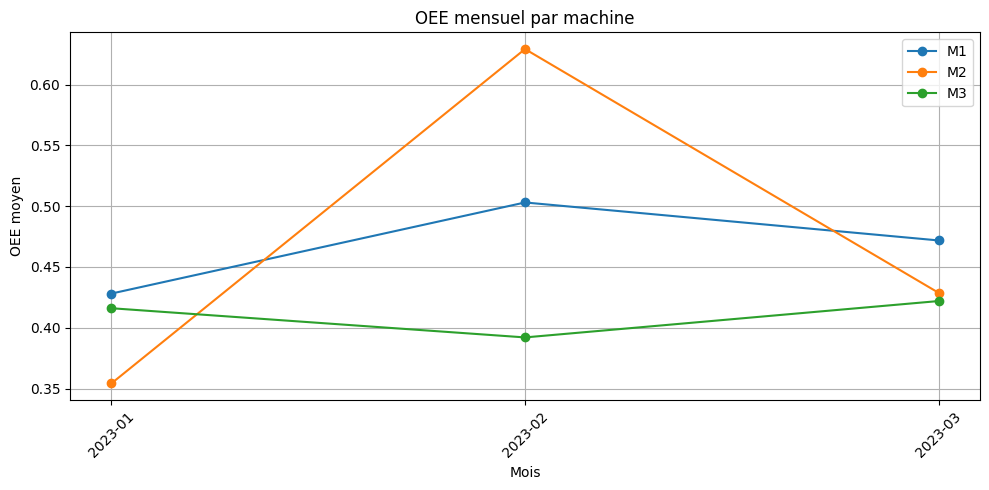

In [4]:
plt.figure(figsize=(10,5))
for machine in monthly_oee["machine_id"].unique():
    subset = monthly_oee[monthly_oee["machine_id"] == machine]
    plt.plot(subset["label"], subset["OEE"], marker="o", label=machine)

plt.title("OEE mensuel par machine")
plt.xlabel("Mois")
plt.ylabel("OEE moyen")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../data/oee_monthly.png", dpi=150)
plt.show()
